In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:

data = pd.read_csv('cancellations_scotland_january_2024.csv')
data.head()

,Month,Country,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF
0,201505,S92000003,28810,NaN,2695,NaN,1057,NaN,853,NaN,523,NaN,262,NaN
1,201506,S92000003,30941,NaN,2800,NaN,1194,NaN,870,NaN,449,NaN,287,NaN
2,201507,S92000003,27725,NaN,2642,NaN,1083,NaN,854,NaN,457,NaN,248,NaN
3,201508,S92000003,28948,NaN,2630,NaN,1080,NaN,912,NaN,491,NaN,147,NaN
4,201509,S92000003,30938,NaN,2829,NaN,1122,NaN,1000,NaN,535,NaN,172,NaN


In [3]:

data_board = pd.read_csv('cancellations_by_board_january_2024.csv')
data_board = data_board.rename(columns={'HBT': 'HB'})
data_board.head()



,Month,HB,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF
0,201505,S08000015,1861,NaN,178,NaN,52,NaN,70,NaN,27,NaN,29,NaN
1,201505,S08000016,457,NaN,66,NaN,11,NaN,10,NaN,45,NaN,0,NaN
2,201505,S08000017,1433,NaN,113,NaN,33,NaN,56,NaN,15,NaN,9,NaN
3,201505,S08000019,1250,NaN,91,NaN,40,NaN,34,NaN,10,NaN,7,NaN
4,201505,S08000020,3310,NaN,264,NaN,110,NaN,71,NaN,76,NaN,7,NaN


In [4]:
hb = pd.read_csv('hb14_hb19.csv')
hb.head()

,HB,HBName,HBDateEnacted,HBDateArchived,Country
0,S08000015,NHS Ayrshire and Arran,20140401,NaN,S92000003
1,S08000016,NHS Borders,20140401,NaN,S92000003
2,S08000017,NHS Dumfries and Galloway,20140401,NaN,S92000003
3,S08000018,NHS Fife,20140401,20180201.0,S92000003
4,S08000019,NHS Forth Valley,20140401,NaN,S92000003


In [5]:
#Add hb names to data_board

data_board = data_board.merge(hb[['HB', 'HBName']], on='HB', how='left')
data_board.head()



,Month,HB,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF,HBName
0,201505,S08000015,1861,NaN,178,NaN,52,NaN,70,NaN,27,NaN,29,NaN,NHS Ayrshire and Arran
1,201505,S08000016,457,NaN,66,NaN,11,NaN,10,NaN,45,NaN,0,NaN,NHS Borders
2,201505,S08000017,1433,NaN,113,NaN,33,NaN,56,NaN,15,NaN,9,NaN,NHS Dumfries and Galloway
3,201505,S08000019,1250,NaN,91,NaN,40,NaN,34,NaN,10,NaN,7,NaN,NHS Forth Valley
4,201505,S08000020,3310,NaN,264,NaN,110,NaN,71,NaN,76,NaN,7,NaN,NHS Grampian


In [6]:

data_hospital = pd.read_csv('cancellations_by_hospital_january_2024.csv')
data_hospital = data_hospital.rename(columns={'Hospital': 'TreatmentLocationCode'})
data_hospital.head()


,Month,TreatmentLocationCode,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF
0,201505,A111H,884,NaN,67,NaN,21,NaN,25,NaN,16,NaN,5,NaN
1,201506,A111H,945,NaN,84,NaN,39,NaN,30,NaN,12,NaN,3,NaN
2,201507,A111H,948,NaN,72,NaN,25,NaN,33,NaN,6,NaN,8,NaN
3,201508,A111H,882,NaN,74,NaN,42,NaN,18,NaN,12,NaN,2,NaN
4,201509,A111H,845,NaN,67,NaN,32,NaN,30,NaN,3,NaN,2,NaN


In [7]:
hospitals = pd.read_csv('hospitals.csv')
hospitals = hospitals.rename(columns={'HospitalCode': 'TreatmentLocationCode'})
hospitals = hospitals.rename(columns={'HealthBoard': 'HB'})
hospitals.head()


,_id,TreatmentLocationCode,HospitalName,AddressLine1,AddressLine2,AddressLine2QF,AddressLine3,AddressLine3QF,AddressLine4,AddressLine4QF,Postcode,HB,HSCP,CouncilArea,IntermediateZone,DataZone
0,1,A101H,Arran War Memorial Hospital,Lamlash,Isle of Arran,NaN,NaN,z,NaN,z,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176
1,2,A103H,Ayrshire Central Hospital,Kilwinning Road,Irvine,NaN,NaN,z,NaN,z,KA128SS,S08000015,S37000020,S12000021,S02002105,S01011213
2,3,A105H,Kirklandside Hospital,Kirklandside,Kilmarnock,NaN,Ayrshire,NaN,NaN,z,KA1 5LH,S08000015,S37000008,S12000008,S02001492,S01007961
3,4,A110H,Lady Margaret Hospital,College St,Millport,NaN,Isle of Cumbrae,NaN,NaN,z,KA280HF,S08000015,S37000020,S12000021,S02002128,S01011328
4,5,A111H,University Hospital Crosshouse,Kilmarnock Road,Kilmarnock,NaN,Ayrshire,NaN,NaN,z,KA2 0BE,S08000015,S37000008,S12000008,S02001504,S01008027


In [8]:
#add hospital names to data_hospital

data_hospital = data_hospital.merge(hospitals[['TreatmentLocationCode', 'HospitalName', 'HB']], on='TreatmentLocationCode', how='left')
data_hospital.head()

,Month,TreatmentLocationCode,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF,HospitalName,HB
0,201505,A111H,884,NaN,67,NaN,21,NaN,25,NaN,16,NaN,5,NaN,University Hospital Crosshouse,S08000015
1,201506,A111H,945,NaN,84,NaN,39,NaN,30,NaN,12,NaN,3,NaN,University Hospital Crosshouse,S08000015
2,201507,A111H,948,NaN,72,NaN,25,NaN,33,NaN,6,NaN,8,NaN,University Hospital Crosshouse,S08000015
3,201508,A111H,882,NaN,74,NaN,42,NaN,18,NaN,12,NaN,2,NaN,University Hospital Crosshouse,S08000015
4,201509,A111H,845,NaN,67,NaN,32,NaN,30,NaN,3,NaN,2,NaN,University Hospital Crosshouse,S08000015


In [9]:
#drop empty columns (QF columns)

data = data.dropna(axis=1, how='all')
data_board = data_board.dropna(axis=1, how='all')
data_hospital = data_hospital.dropna(axis=1, how='all')

In [10]:
#print columns
print(data.columns)
print(data_board.columns)
print(data_hospital.columns)

Index(['Month', 'Country', 'TotalOperations', 'TotalCancelled',
       'CancelledByPatientReason', 'ClinicalReason',
       'NonClinicalCapacityReason', 'OtherReason'],
      dtype='object')
Index(['Month', 'HB', 'TotalOperations', 'TotalCancelled',
       'CancelledByPatientReason', 'ClinicalReason',
       'NonClinicalCapacityReason', 'OtherReason', 'HBName'],
      dtype='object')
Index(['Month', 'TreatmentLocationCode', 'TotalOperations', 'TotalCancelled',
       'CancelledByPatientReason', 'ClinicalReason',
       'NonClinicalCapacityReason', 'OtherReason', 'HospitalName', 'HB'],
      dtype='object')


In [11]:
#check for missing values and duplicates
print(data.isnull().sum())
print("-------------------")
print(data_board.isnull().sum())
print("-------------------")
print(data_hospital.isnull().sum())

Month                        0
Country                      0
TotalOperations              0
TotalCancelled               0
CancelledByPatientReason     0
ClinicalReason               0
NonClinicalCapacityReason    0
OtherReason                  0
dtype: int64
-------------------
Month                          0
HB                             1
TotalOperations                0
TotalCancelled                 0
CancelledByPatientReason       0
ClinicalReason                 0
NonClinicalCapacityReason      0
OtherReason                    0
HBName                       105
dtype: int64
-------------------
Month                          0
TreatmentLocationCode          0
TotalOperations                0
TotalCancelled                 0
CancelledByPatientReason       0
ClinicalReason                 0
NonClinicalCapacityReason      0
OtherReason                    0
HospitalName                 276
HB                           276
dtype: int64


In [12]:

hb_set = set(hb['HB'].values)
data_board_set = set(data_board['HB'].values)

# Elements in hb_set but not in data_board_set
difference_hb_data_board = hb_set - data_board_set
print("Elements in hb but not in data_board: ", difference_hb_data_board)


# Elements in data_board_set but not in hb_set
difference_data_board_hb = data_board_set - hb_set
print("Elements in data_board but not in hb: ", difference_data_board_hb)


Elements in hb but not in data_board:  {'S08000018', 'S08000027', 'S08000023', 'S08000021'}
Elements in data_board but not in hb:  {nan, 'SB0801'}


In [13]:
#drop row with null

print(data_board.shape)

data_board = data_board.dropna(subset=['HB'])
#data_board = data_board[data_board.HB != 'SB0801']

print(data_board.shape)


(1575, 9)
(1574, 9)


In [14]:
hospitals_set = set(hospitals['TreatmentLocationCode'].values)
data_hospital_set = set(data_hospital['TreatmentLocationCode'].values)

# Elements in hospitals_set but not in data_hospital_set
difference_hospitals_data_hospital = hospitals_set - data_hospital_set
print("Elements in hospitals but not in data_hospital: ", difference_hospitals_data_hospital)

# Elements in data_hospital_set but not in hospitals_set
difference_data_hospital_hospitals = data_hospital_set - hospitals_set
print("Elements in data_hospital but not in hospitals: ", difference_data_hospital_hospitals)

Elements in hospitals but not in data_hospital:  {'A202E', 'G599H', 'L306H', 'H214H', 'L203H', 'S317H', 'G113H', 'S240H', 'T314H', 'G598H', 'B129H', 'S320H', 'Y142H', 'S310H', 'N501H', 'C113H', 'H226H', 'L395E', 'G108H', 'H106H', 'Y107H', 'D101H', 'Y120H', 'H229H', 'F705H', 'L307H', 'A208H', 'T113H', 'G517H', 'B124H', 'T122H', 'C114H', 'N336H', 'T115H', 'T317H', 'G613H', 'A114H', 'G507H', 'A110H', 'L216H', 'G106H', 'S234H', 'V106H', 'C420H', 'F708H', 'A218H', 'L204H', 'B123H', 'H213H', 'G505H', 'S201H', 'C122H', 'T215H', 'T322H', 'F714H', 'Y138H', 'B122H', 'N337H', 'Y108H', 'V215H', 'B114H', 'N352H', 'G602H', 'N401E', 'F709H', 'H215H', 'T316H', 'T319H', 'N104H', 'G408H', 'N496H', 'T320H', 'S209H', 'G112H', 'L105H', 'N184H', 'S307H', 'B103H', 'S318H', 'Y132H', 'C403H', 'S108H', 'G410H', 'G605H', 'H221H', 'N494H', 'S203H', 'S243H', 'G611H', 'A216H', 'T321H', 'T305H', 'N492H', 'G610H', 'V216H', 'T310H', 'L206H', 'T221H', 'G302H', 'T104H', 'H104H', 'N334H', 'Y114H', 'N332H', 'N151H', 'L211

In [20]:
#cancellations by board

totals_by_board = data_board.groupby('HBName')[['TotalCancelled', 'TotalOperations', 'CancelledByPatientReason', 'ClinicalReason', 'NonClinicalCapacityReason', 'OtherReason']].sum().reset_index()

totals_by_board['CancellationRate'] = totals_by_board['TotalCancelled'] / totals_by_board['TotalOperations']
totals_by_board['CancellationRate'] = totals_by_board['CancellationRate'] * 100

totals_by_board['PatientCancellationRate'] = totals_by_board['CancelledByPatientReason'] / totals_by_board['TotalCancelled']
totals_by_board['PatientCancellationRate'] = totals_by_board['PatientCancellationRate'] * 100

totals_by_board['ClinicalCancellationRate'] = totals_by_board['ClinicalReason'] / totals_by_board['TotalCancelled']
totals_by_board['ClinicalCancellationRate'] = totals_by_board['ClinicalCancellationRate'] * 100

totals_by_board['NonClinicalCancellationRate'] = totals_by_board['NonClinicalCapacityReason'] / totals_by_board['TotalCancelled']
totals_by_board['NonClinicalCancellationRate'] = totals_by_board['NonClinicalCancellationRate'] * 100

totals_by_board['OtherCancellationRate'] = totals_by_board['OtherReason'] / totals_by_board['TotalCancelled']
totals_by_board['OtherCancellationRate'] = totals_by_board['OtherCancellationRate'] * 100

totals_by_board = totals_by_board.sort_values(by='CancellationRate', ascending=False)
totals_by_board.head()

print(totals_by_board.columns)

Index(['HBName', 'TotalCancelled', 'TotalOperations',
       'CancelledByPatientReason', 'ClinicalReason',
       'NonClinicalCapacityReason', 'OtherReason', 'CancellationRate',
       'PatientCancellationRate', 'ClinicalCancellationRate',
       'NonClinicalCancellationRate', 'OtherCancellationRate'],
      dtype='object')


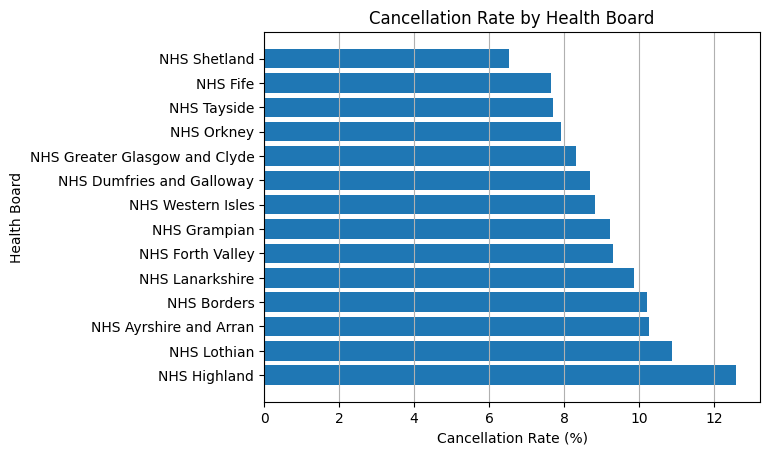

In [21]:
#plot cancellation percentage by board

plt.barh(totals_by_board['HBName'], totals_by_board['CancellationRate'])
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Health Board')
plt.title('Cancellation Rate by Health Board')
plt.grid(axis='x')
plt.show()



In [24]:
#plot cancellation reason percentage by board

totals_by_board = totals_by_board.sort_values(by='HBName', ascending=True)

totals_by_board[['PatientCancellationRate', 'ClinicalCancellationRate', 'NonClinicalCancellationRate', 'OtherCancellationRate']].plot(kind='bar', stacked=True)
plt.xlabel('Health Board')
plt.ylabel('Cancellation Rate (%)')
plt.title('Cancellation Rate by Health Board')
plt.grid(axis='y')
plt.show()



,HBName,TotalCancelled,TotalOperations,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,CancellationRate,PatientCancellationRate,ClinicalCancellationRate,NonClinicalCancellationRate,OtherCancellationRate
0,NHS Ayrshire and Arran,15721,152999,4809,6991,3072,849,10.275231,30.589657,44.469181,19.540742,5.400420
1,NHS Borders,3477,34069,888,807,1731,51,10.205759,25.539258,23.209664,49.784297,1.466782
2,NHS Dumfries and Galloway,12470,143662,3952,5540,2369,606,8.680096,31.692061,44.426624,18.997594,4.859663
3,NHS Fife,9792,127992,2648,3950,3087,107,7.650478,27.042484,40.339052,31.525735,1.092729
4,NHS Forth Valley,9021,96995,3238,3143,2190,450,9.300479,35.894025,34.840927,24.276688,4.988360
